In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_FC_PREP_0522.csv')

df.head()
df.info()
print(f'Dataset size: {df.shape}')

,POD,RATE
0,2005-07-19,2200.0
1,2005-07-20,2250.0
2,2005-07-21,2300.0
3,2005-07-22,2280.0
4,2005-07-23,2260.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POD     6375 non-null   object 
 1   RATE    6375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 99.7+ KB
Dataset size: (6375, 2)


In [11]:
df['POD'] = pd.to_datetime(df['POD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   POD     6375 non-null   datetime64[ns]
 1   RATE    6375 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 99.7 KB


In [12]:
from sklearn.decomposition import PCA

#returns PCA fitted to data
def pcaEigenDecomp(X):
    pca_all = PCA()
    pca_all.fit(X)
    return pca_all

#plots eigen vector
#eigen vector chosen should have cummulative > 0.65
def pcaPlotEigenVec(pca_all, numOfFeatures):
    eigen_energy=pca_all.explained_variance_ratio_
    print(eigen_energy)

    cum_var_exp = np.cumsum(eigen_energy)

    plt.step(range(1,numOfFeatures), cum_var_exp, where='mid',
         label='cumulative explained variance')

    plt.bar(range(1,numOfFeatures), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
    plt.xlabel('PC')
    plt.ylabel('eigen_variance_energy_ratio')
    plt.title("Plot of eigen variance energy captured by Principle component")

#takes in X and the number of principle components to be used
#returns PCA fitted with pcaComponents, and transformed pca
def pcaDimensionReduction(X, pcaComponents):
    pca_2 = PCA(n_components=pcaComponents)
    pca_2.fit(X)
    X_pca_2=pca_2.transform(X)
    print(X_pca_2)
    print(X_pca_2.shape) #only pcaComponents PC used
    return pca_2, X_pca_2

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression 
def findLR(X_train, X_test, y_train, y_test):
    # Create a linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate the root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy of your model in percentage
    accuracy = r2 * 100
    
    # Print the results
    print('Root Mean Squared Error:', round(rmse, 3))
    print('R-squared:', round(r2, 3))
    print(f"Accuracy: {accuracy:.2f}%")

<p>The script for linear regression is using R-squared as the metric to calculate the accuracy of the model. R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variable(s) in the model. It ranges from 0 to 1, with 1 indicating a perfect fit of the model to the data. Therefore, to convert the R-squared value to a percentage, we multiply it by 100.</p>

In [14]:
from sklearn.tree import DecisionTreeRegressor

def findDT(X_train, X_test, y_train, y_test):
    # Train the model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions on test data
    predictions = model.predict(X_test)

    # Calculate mean squared error between actual and predicted values
    mse = mean_squared_error(y_test, predictions)

    # Calculate root mean squared error
    rmse = np.sqrt(mse)

    # Calculate R-squared value
    r2 = r2_score(y_test, predictions)

    # Calculate mean value of your actual data
    mean = np.mean(y_test)

    # Calculate accuracy of your model in percentage
    accuracy = (1 - rmse/mean) * 100

    print('Root Mean Squared Error:', round(rmse, 3))
    print('R-squared:', round(r2, 3))
    print(f"Accuracy: {accuracy:.2f}%")

<p>The script for decision trees is using RMSE (root mean squared error) to calculate the accuracy of the model. RMSE is a measure of the differences between predicted and actual values, and it is expressed in the same units as the dependent variable. To convert RMSE to a percentage, we use the formula (1 - RMSE/mean) * 100. This formula calculates the percentage of variance in the dependent variable that is explained by the model.</p>

In [15]:
from sklearn.ensemble import RandomForestRegressor

def findRF(X_train, X_test, y_train, y_test):
    # Build the random forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict the test data
    y_pred = rf_model.predict(X_test)

    # Calculate the root mean squared error
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)

    # Calculate the accuracy score in percentage
    mean = y_test.mean()
    accuracy = (1 - rmse/mean) * 100

    print("Root Mean Squared Error:", round(rmse, 3))
    print("R-squared Value:", round(r2, 3))
    print("Accuracy Score:", round(accuracy, 2), "%")

In [16]:
from sklearn.svm import SVR
def findSVM(X_train, X_test, y_train, y_test):
    # Create and train SVM model
    model = SVR(kernel='linear')
    model.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = model.predict(X_test)

    # Calculate root mean squared error and r-squared value
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Calculate mean value of your actual data
    mean = np.mean(y_test)

    # Calculate accuracy of your model in percentage
    accuracy = (1 - rmse/mean) * 100

    # Print results
    print(f"Root Mean Squared Error: {rmse:.3f}")
    print(f"R-Squared Value: {r2:.3f}")
    print(f"Accuracy: {accuracy:.2f}%")

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def findNN(X_train, X_test, y_train, y_test):
    # Define the model architecture
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    # Make predictions on test set
    y_pred = model.predict(X_test)

    # Calculate root mean squared error (RMSE) and R-squared value
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Calculate accuracy of the model in percentage
    mean = np.mean(y_test)
    accuracy = (1 - rmse/mean) * 100

    # Print RMSE, R-squared value, and accuracy score
    print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
    print("R-squared Value: {:.2f}".format(r2))
    print("Accuracy: {:.2f}%".format(accuracy))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Y is the target
Y = df.pop('RATE') 
X = df

#normalise
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

[1.]


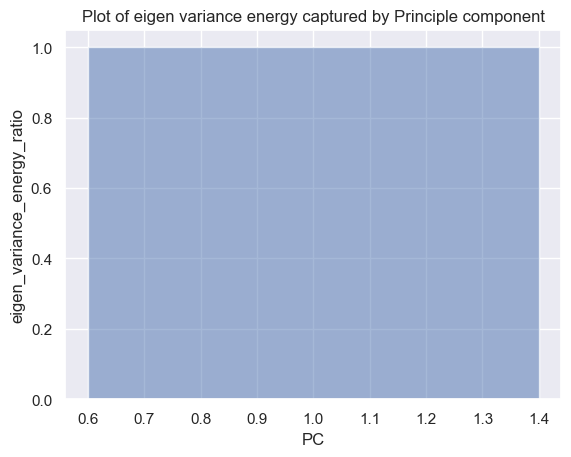

In [19]:
#plot PCA to determine PCs
pca_all = pcaEigenDecomp(X)
totalComponents = df.shape[1]
pcaPlotEigenVec(pca_all, totalComponents+1)

In [20]:
findLR(X_train, X_test, y_train, y_test)

Root Mean Squared Error: 1886.395
R-squared: 0.182
Accuracy: 18.23%


In [21]:
# Decision Tree
print("Decision Tree Model Results:")
findDT(X_train, X_test, y_train, y_test)

Decision Tree Model Results:
Root Mean Squared Error: 125.489
R-squared: 0.996
Accuracy: 92.56%


In [22]:
# Random Forest
print("Random Forest Model Results:")
findRF(X_train, X_test, y_train, y_test)

Random Forest Model Results:
Root Mean Squared Error: 105.919
R-squared Value: 0.997
Accuracy Score: 93.72 %


In [23]:
# Support Vector Machines(SVM)
print("Support Vector Machines(SVM) Model Results:")
findSVM(X_train, X_test, y_train, y_test)

Support Vector Machines(SVM) Model Results:
Root Mean Squared Error: 2296.366
R-Squared Value: -0.212
Accuracy: -36.08%


In [24]:
# Neural Network
print("Neural Network Model Results:")
findNN(X_train, X_test, y_train, y_test)

Neural Network Model Results:
Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 6360246.5000 - val_loss: 7212761.0000
Epoch 2/100
128/128 [==============================] - 0s 1ms/step - loss: 6177764.0000 - val_loss: 6821631.0000
Epoch 3/100
128/128 [==============================] - 0s 1ms/step - loss: 5579629.5000 - val_loss: 5901906.5000
Epoch 4/100
128/128 [==============================] - 0s 1ms/step - loss: 4600924.0000 - val_loss: 4746703.5000
Epoch 5/100
128/128 [==============================] - 0s 1ms/step - loss: 3697567.2500 - val_loss: 3877025.0000
Epoch 6/100
128/128 [==============================] - 0s 1ms/step - loss: 3151153.2500 - val_loss: 3384236.0000
Epoch 7/100
128/128 [==============================] - 0s 1ms/step - loss: 2883793.2500 - val_loss: 3132050.2500
Epoch 8/100
128/128 [==============================] - 0s 1ms/step - loss: 2776991.5000 - val_loss: 3021231.0000
Epoch 9/100
128/128 [==============================] - 0s 1ms/step